<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/DS_Stat_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("/content/drive/MyDrive/SkillBox/bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [3]:
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


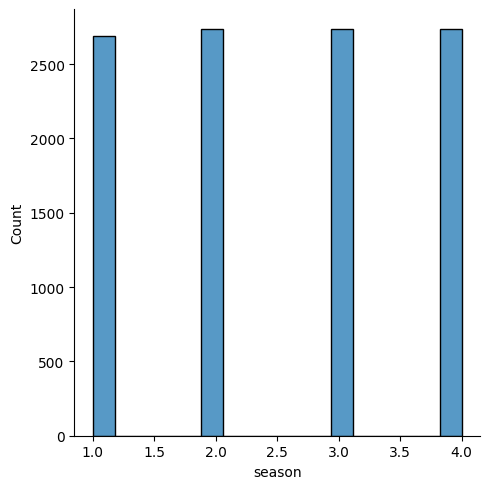

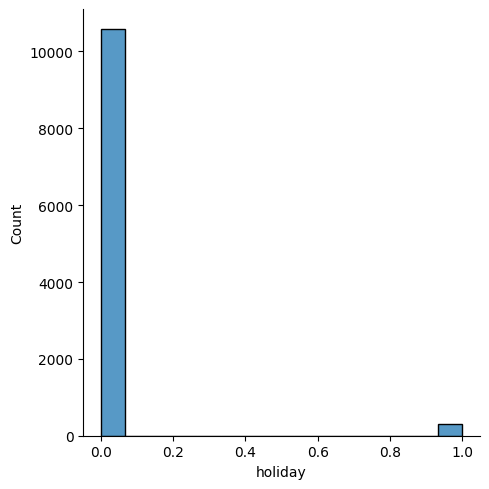

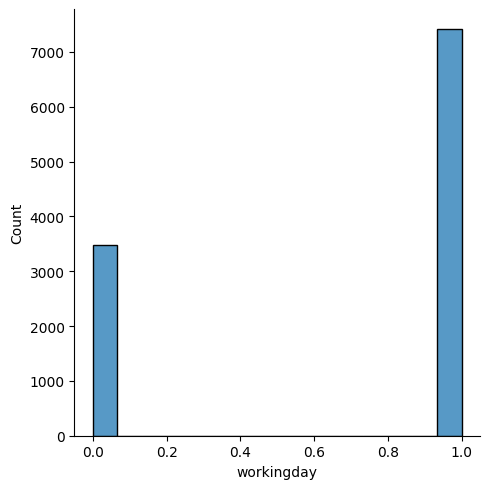

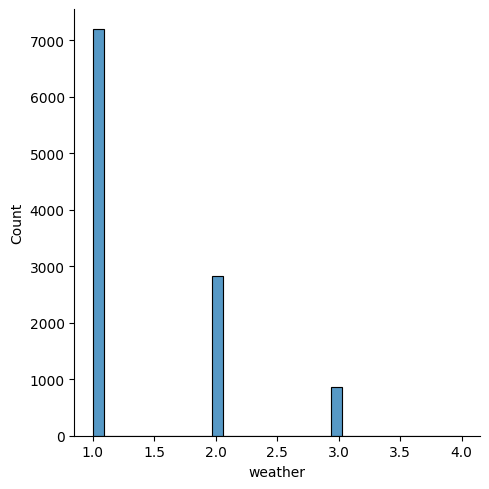

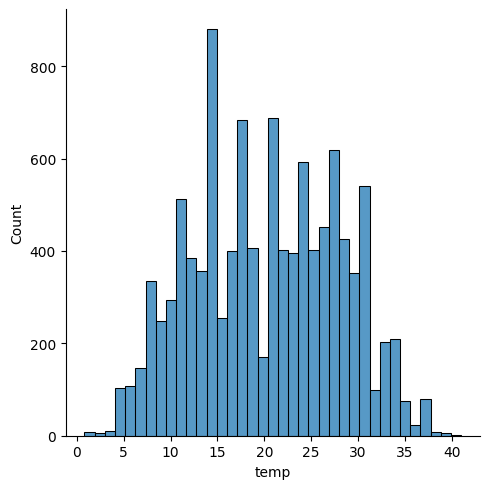

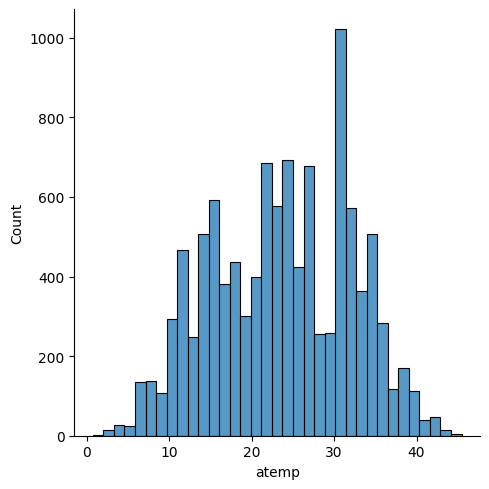

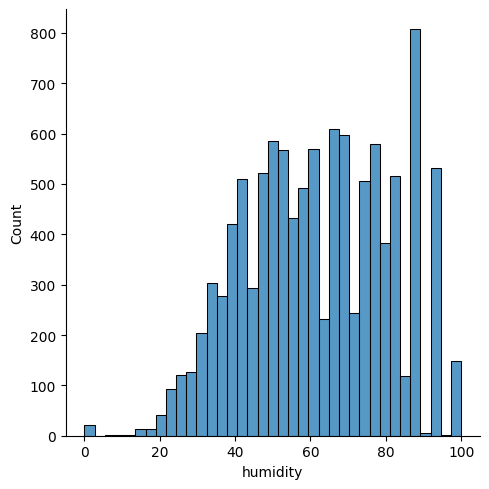

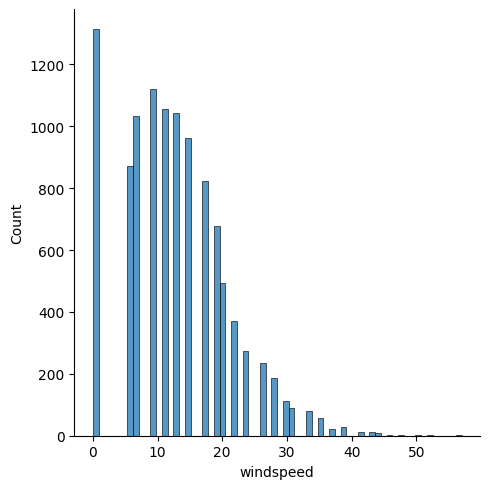

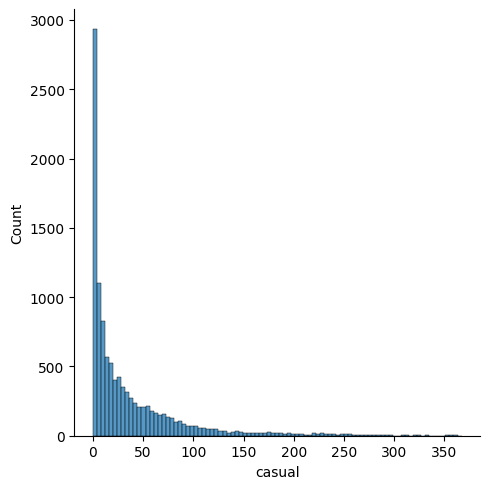

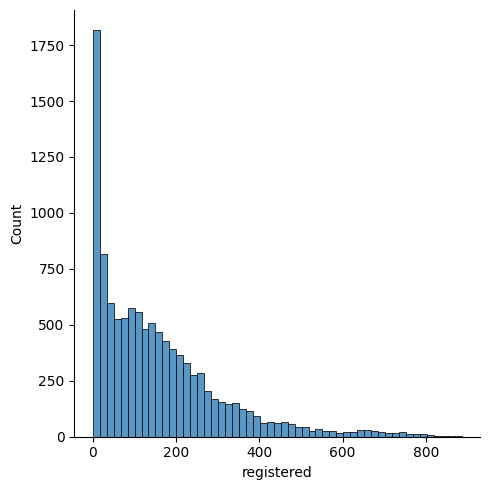

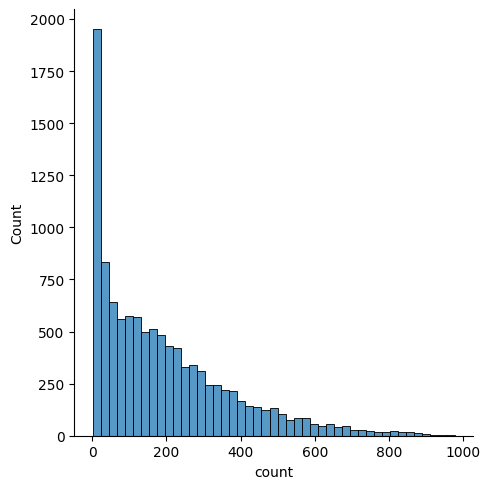

In [35]:
for i, col in enumerate(df.columns):
  sns.displot(df[col])
plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [5]:
for i, col in enumerate(df.columns):
  print(f"""{col}:

{df[col].describe()}

Мода:
{df[col].value_counts().nlargest(10)}

""")

season:

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

Мода:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


holiday:

count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

Мода:
0    10575
1      311
Name: holiday, dtype: int64


workingday:

count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

Мода:
1    7412
0    3474
Name: workingday, dtype: int64


weather:

count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%        

### 3. (*)
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [6]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [7]:
for col in df.columns:
  print(f"""{col}:
Асимметрия: {skew(df[col])}
Эксцесс: {skew(df[col])}
        """)

season:
Асимметрия: -0.007074695296526289
Эксцесс: -0.007074695296526289
        
holiday:
Асимметрия: 5.6597371332540805
Эксцесс: 5.6597371332540805
        
workingday:
Асимметрия: -0.7760560687198784
Эксцесс: -0.7760560687198784
        
weather:
Асимметрия: 1.2433126730817885
Эксцесс: 1.2433126730817885
        
temp:
Асимметрия: 0.0036903358354289715
Эксцесс: 0.0036903358354289715
        
atemp:
Асимметрия: -0.10254538108264065
Эксцесс: -0.10254538108264065
        
humidity:
Асимметрия: -0.0863232869219358
Эксцесс: -0.0863232869219358
        
windspeed:
Асимметрия: 0.5886853963635482
Эксцесс: 0.5886853963635482
        
casual:
Асимметрия: 2.495404491505502
Эксцесс: 2.495404491505502
        
registered:
Асимметрия: 1.5245944734221468
Эксцесс: 1.5245944734221468
        
count:
Асимметрия: 1.241895058803035
Эксцесс: 1.241895058803035
        


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95.

<ipython-input-22-779a65e1e8f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'])


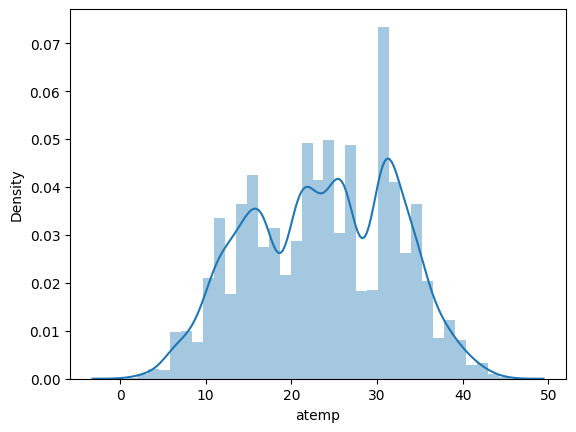

In [22]:
sns.distplot(df['atemp'])
plt.show()

In [23]:
def my_norm_confidence(df, column, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [25]:
confidence = my_norm_confidence(df, 'atemp')
print(confidence)

(7.045172041640921, 40.26499606418308)


Text(0.5, 1.0, 'Доверительный интервал')

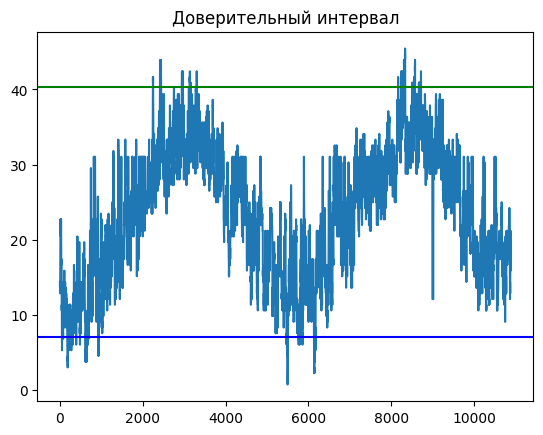

In [26]:
df['atemp'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="b", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [30]:
for i, col in enumerate(df.columns):
  upper_level = df[col].mean() + 3*df[col].std()
  lower_level = df[col].mean() - 3*df[col].std()
  print(col)
  print(lower_level,upper_level)
  print(f'Выходящих значений: {len(df[(df[col] > upper_level) | (df[col] < lower_level)])}\n')

season
-0.8419089284004193 5.85513692766553
Выходящих значений: 0

holiday
-0.47122774790572897 0.5283653558425285
Выходящих значений: 311

workingday
-0.7176029886700133 2.0793520241284003
Выходящих значений: 0

weather
-0.48308841959213944 3.3199430953224356
Выходящих значений: 1

temp
-3.1439097120104726 43.60562935191493
Выходящих значений: 0

atemp
-1.7687178265428436 49.078885932366845
Выходящих значений: 0

humidity
4.151359840790391 119.62155950515853
Выходящих значений: 22

windspeed
-11.694216573571364 37.29300738746076
Выходящих значений: 67

casual
-113.85947491361273 185.90338452228443
Выходящих значений: 292

registered
-297.5649221375612 608.669276353986
Выходящих значений: 235

count
-351.8592295783075 735.0074934034039
Выходящих значений: 147



Больше всего аномалий в registered и casual

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

<Axes: >

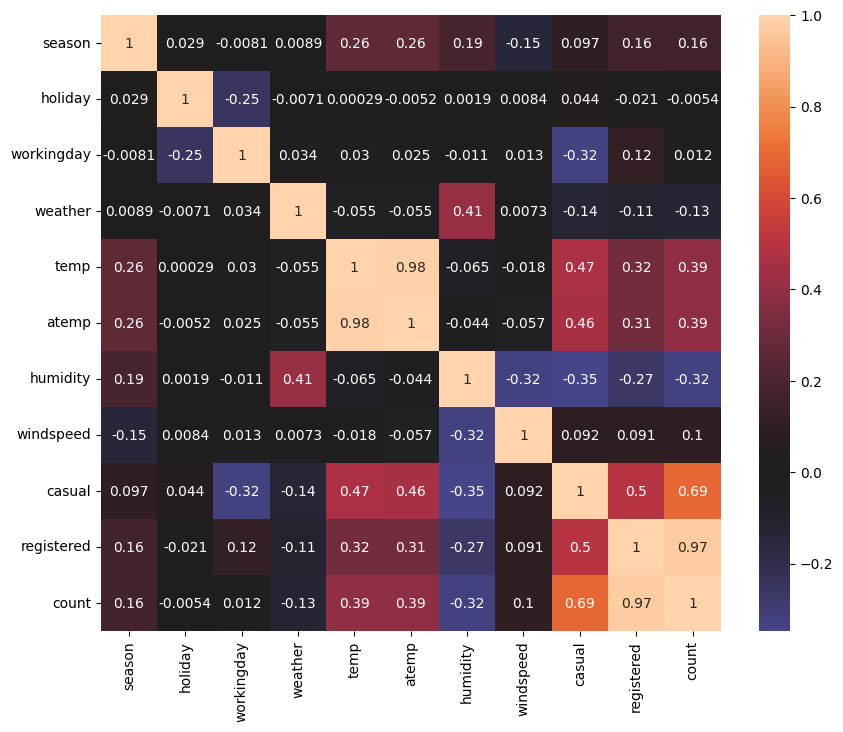

In [38]:
corr_m = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_m, center=0, annot=True)

Помимо очевидных связей (например, что количество зарегистрированных пользователей связано с количеством пользователей в целом, или ощущаемая температура - с температурой по термометру), можно наблюдать, что количество пользователей умеренно связано с температурой в этот день - чем теплее на улице, тем с большей вероятностью люди будут использовать аренду велосипедов.


Также показатели погоды умеренно связаны друг с другом - например, скорость ветра с влажностью и т.д.